# Pricing of Some Exotic Options

## Introduction

In this project, we explore the arbitrage relations for weighted geometric and arithmetic basket call options. We derive pure arbitrage bounds for the arithmetic basket call option and perform numerical calculations to price these options under the Black-Scholes framework. Additionally, we examine a real-world application involving equity-linked notes.

## Setup
We will consider some pure arbitrage relations for Basket options. We will look at two types of Basket call options: weighted geometric and weighted arithmetic. We assume that the weights $c_{i}$ are positive and sum to one. The pay-off at maturity for the geometric Basket call is defined as:

$$
\left(\left(\prod_{i=1}^{n}\left(S_{i}(T)\right)^{c_{i}}\right)-K\right)^{+}=\left(\exp \left(\sum_{i=1}^{n} c_{i} X_{i}(T)\right)-K\right)^{+}
$$

where $X_{i}(T)=\log \left(S_{i}(T)\right)$ and where $S_{1}, \cdots, S_{n}$ are $n$ different stocks. The corresponding arithmetic Basket call has a pay-off defined as:

$$
\left(\left(\sum_{i=1}^{n} c_{i} S_{i}(T)\right)-K\right)^{+}
$$

where $S_{1}, S_{2}, \cdots, S_{n}$ are as above. In the following let $P_{E_{i}}^{c}(t, T, K), P_{G B}^{c}(t, T, K)$ and $P_{A B}^{c}(t, T, K)$ be the price at time $t$ of a European Call option with $S_{i}$ as underlying asset, a geometric Basket call option and an arithmetic Basket call option all with strike price $K$ and maturity at time $T$.

Before trying to price these options, we will go through a theoretical result, which will help us verify the correctness of our implementation. We cannot find an analytical price for the arithmetic Basket Call. However, the price $\left(P_{A B}^{c}(0, T, K)\right)$ of a call option must lie between the following bounds:

$$
P_{G B}^{c}(0, T, K) \leqslant P_{A B}^{c}(0, T, K) \leqslant \sum_{i=1}^{n} c_{i} P_{E_{i}}^{c}\left(0, T, K_{i}\right)
$$

where $\sum_{i=1}^{n} c_{i} K_{i}=K$. The next section will be dedicated to proving these inequalities.

## Proving the Basket inequalities
### Lower Bound
Note that $ f(x) = \max(X - K, 0) = (X - K)^{+} $ is convex in $ X $. By Jensen's inequality we have 

$$
\begin{equation} %\label{eq: jensen}
f \left( \sum_{i=1}^n c_i X_i \right) \leq \sum_{i=1}^n c_i f(X_i), \tag{1}
\end{equation}
$$

for weights $ c_i $ such that 

$$
\begin{equation*}
\sum_{i=1}^n c_i = 1.
\end{equation*}
$$

Also note that for the Arithmetic Basket Call we have

$$
\begin{equation} %\label{eq: ABC}
\underbrace{\left( \sum_{i=1}^n c_i S_i(T) - K \right)^{+}}_{\Phi_{AB}^c(\mathbf{S}(T))} = \left( \sum_{i=1}^n c_i (S_i(T) - K_i) \right)^{+} \overset{\text{Jensen}}{\leq} \sum_{i=1}^n c_i \underbrace{(S_i(T) - K_i)^{+}}_{\Phi_{E_i}^c(S_i(T))}. \tag{2}
\end{equation}
$$

In the first equality in equation 2 we simply used the assumption 

$$
\begin{equation*}
    \sum_{i=1}^n c_i K_i = K.
\end{equation*}
$$

For ease of notation we will rewrite the equation in 2 in terms of the payoff functions $\Phi_{AB}^c(\mathbf{S}(T))$ and $\Phi_{E_i}^c(S_i(T))$ as indicated in the underbraces of equation 2. Here the bold $\mathbf{S}(T)$ simply means $\{S_1(T) \dots S_n(T)\}$. We can write equation 2 as
$$
\begin{equation}%\label{eq: ABC_short}
    \Phi_{AB}^c(\mathbf{S}(T)) \leq \sum_{i=1}^n c_i \Phi_{E_i}^c(S_i(T)) \tag{3}
\end{equation}
$$

Now, for a probability space $ (\Omega, \mathcal{F}, \mathbb{P}) $ and $ \mathcal{G} $ a sub-$\sigma$-field of $ \mathcal{F} $, it's fairly known that, for integrable random variables $ X, Y $ on $ (\Omega, \mathcal{F}, \mathbb{P}) $, the conditional expectation is monotone (almost surely), that is:

$$
\begin{equation*}
X \leq Y \text{ a.s. } \implies \mathbb{E}(X|\mathcal{G}) \leq \mathbb{E}(Y|\mathcal{G}) \text{ a.s. }
\end{equation*}
$$

So, taking the expectation (risk-neutral measure) on both side of the inequality in equation 3 conditioned on the stock prices at time $0$ multiplied by the discounting factor we get:

$$
\begin{align}
\overbrace{e^{-rT} \mathbb{E}^{\mathbb{Q}}\left[ \Phi_{AB}^c(\mathbf{S}(T)) \Bigg|\mathbf{S}(0)
\right]}^{P_{AB}^c(0, T, K)} &\leq e^{-rT} \mathbb{E}^{\mathbb{Q}}\left[\sum_{i=1}^n c_i \Phi_{E_i}^c(S_i(T)) \Bigg| \mathbf{S}(0)
\right] \tag{4} \\ %\label{eq:RNVF1} \\
&= \sum_{i=1}^n c_i \underbrace{e^{-rT} \mathbb{E}^{\mathbb{Q}}\left[\Phi_{E_i}^c(S_i(T)) \big| S_i(0)\right]}_{P_{E_i}^{c}(0, T, K_i)} \tag{5} \\ % \label{eq:RNVF2} \\
&= \sum_{i=1}^n c_i P_{E_i}^{c}(0, T, K_i). \nonumber
\end{align}
$$

As indicated in the braces in equation 4 and 5 the discounted conditional risk-neutral expected values correspond to the option prices as indicated. This can be done since these expectations correspond precisely to the  Risk Neutral Valuation Formula, which holds in arbitrage free and complete markets.
Thus, 

$$
\begin{equation*}
P_{AB}^{c}(0, T, K) \leq \sum_{i=1}^n c_i P_{E_i}^{c}(0, T, K_i).
\end{equation*}
$$

### Upper Bound

Due to the convexity of the exponential function, we have by Jensen's inequality:

$$
\begin{equation*}
\exp\left( \sum_{i=1}^n c_i \log S_i(T) \right) \leq \sum_{i=1}^n c_i \exp(\log S_i(T)) = \sum_{i=1}^n c_i S_i(T).
\end{equation*}
$$

Subtracting $ K $ on both sides:

$$
\begin{equation*}
\exp\left( \sum_{i=1}^n c_i \log S_i(T) \right) - K \leq \sum_{i=1}^n c_i S_i(T) - K.
\end{equation*}
$$

Now, since $ \max(x, 0) $ is monotone:
$$
\begin{align*}
\underbrace{\left( \exp\left( \sum_{i=1}^n c_i \log S_i(T) \right) - K \right)^{+}}_{\Phi_{GB}^c(\mathbf{S}(T))} \leq&\underbrace{ \left( \sum_{i=1}^n c_i S_i(T) - K \right)^{+}}_{ \Phi_{AB}^c(\mathbf{S}(T)) }.
\end{align*}
$$

With the same argument as before (monotonicity of conditional expectation) we may write 

$$
\begin{align*}
    e^{-rT} \mathbb{E}^{\mathbb{Q}}\left[ \Phi_{GB}^c(\mathbf{S}(T)) \Bigg|\mathbf{S}(0)
    \right] &\leq e^{-rT} \mathbb{E}^{\mathbb{Q}}\left[\Phi_{AB}^c(\mathbf{S}(T)) \Bigg| \mathbf{S}(0)
    \right],
\end{align*}
$$

which implies
$$
\begin{equation*}
P_{GB}^{c}(0, T, K) \leq P_{AB}^{c}(0, T, K),
\end{equation*}
$$

as per the risk neutral valuation formula.

## Analytical Pricing of the Geometric Basket Call

As mentioned earlier, the arithmetic basket call cannot be priced analytically, so we will resort to numerical methods for that later. However, the lower bound of the arithmetic basket call—the geometric basket call—can be priced analytically. Therefore, there is no need to price it numerically. Furthermore, calculating the analytical price can help us verify the correctness of our arithmetic basket call pricing by ensuring it satisfies this bound. Even better, we can use the geometric basket call as a control variate to reduce variance in our Monte Carlo simulations. We will explain this technique in more detail later. For now, we will focus on deriving an analytical expression for the price of the geometric basket call.

### Assumptions of the Black-Scholes Market

We assume that the market follows the Black-Scholes framework, where each underlying asset price $ S_i(t) $ follows a geometric Brownian motion under the risk-neutral measure $ \mathbb{Q} $:

$$
dS_i(t) = r S_i(t) dt + \sigma_i S_i(t) dW_i(t),
$$

where:

- $ r $ is the constant risk-free interest rate.
- $ \sigma_i $ is the volatility of asset $ i $.
- $ W_i(t) $ is a standard Brownian motion under $ \mathbb{Q} $.
- $ \rho_{ij} $ is the correlation coefficient between $ W_i(t) $ and $ W_j(t) $.

### Deriving the Analytical Price

#### Simplifying the Payoff

The payoff of the geometric basket call option at maturity $ T $ is:

$$
\left( \prod_{i=1}^{n} S_i(T)^{c_i} - K \right)^{+},
$$

where $ c_i $ are positive weights such that $ \sum_{i=1}^{n} c_i = 1 $. We start by expressing the product inside the payoff as an exponential of a sum:

$$
\prod_{i=1}^{n} S_i(T)^{c_i} = \exp\left( \sum_{i=1}^{n} c_i \log S_i(T) \right) = \exp(X),
$$

where we define:

$$
X = \sum_{i=1}^{n} c_i \log S_i(T).
$$

#### Modeling $ X $ Under the Risk-Neutral Measure

Under the Black-Scholes model, the price of each asset $ S_i(T) $ at time $ T $ is given by:

$$
S_i(T) = S_i(0) \exp\left( \left( r - \frac{\sigma_i^2}{2} \right) T + \sigma_i W_i(T) \right),
$$

since the drift term $ \mu_i $ is replaced by the risk-free rate $ r $ under the risk-neutral measure.

Substituting $ \log S_i(T) $ into $ X $, we get:

$$
\begin{aligned}
X &= \sum_{i=1}^{n} c_i \left( \log S_i(0) + \left( r - \frac{\sigma_i^2}{2} \right) T + \sigma_i W_i(T) \right) \\
&= \sum_{i=1}^{n} c_i \log S_i(0) + \left( r - \frac{1}{2} \sum_{i=1}^{n} c_i \sigma_i^2 \right) T + \sum_{i=1}^{n} c_i \sigma_i W_i(T).
\end{aligned}
$$

We can simplify $ X $ as:

$$
X = a + \sum_{i=1}^{n} c_i \sigma_i W_i(T),
$$

where:

$$
a = \sum_{i=1}^{n} c_i \left( \log S_i(0) + \left( r - \frac{\sigma_i^2}{2} \right) T \right).
$$

#### Calculating the Mean and Variance

The term $ \sum_{i=1}^{n} c_i \sigma_i W_i(T) $ is normally distributed since it is a linear combination of normal variables. Its mean is zero, and its variance $ b $ is:

$$
\begin{aligned}
b &= \text{Var}\left( \sum_{i=1}^{n} c_i \sigma_i W_i(T) \right) \\
&= \sum_{i=1}^{n} \sum_{j=1}^{n} c_i c_j \sigma_i \sigma_j \text{Cov}\left( W_i(T), W_j(T) \right) \\
&= T \sum_{i=1}^{n} \sum_{j=1}^{n} c_i c_j \sigma_i \sigma_j \rho_{ij}.
\end{aligned}
$$

Therefore, $ X $ is normally distributed with mean $ a $ and variance $ b $:

$$
X \sim \mathcal{N}\left( a, b \right).
$$

#### Expressing the Option Price

The price of the geometric basket call option is the discounted expected payoff under the risk-neutral measure:

$$
\begin{aligned}
P_{GB}^{c}(0, T, K) &= e^{-rT} \mathbb{E}^{\mathbb{Q}} \left[ \left( \exp(X) - K \right)^{+} \right] \\
&= e^{-rT} \mathbb{E}^{\mathbb{Q}} \left[ \left( \exp(a + \sqrt{b} G) - K \right)^{+} \right],
\end{aligned}
$$

where $ G \sim \mathcal{N}(0, 1) $.

#### Evaluating the Expected Value

To compute the expected value, we set up the integral:

$$
P_{GB}^{c}(0, T, K) = e^{-rT} \int_{-\infty}^{\infty} \max\left( \exp(a + \sqrt{b} x) - K, 0 \right) \frac{e^{-x^2 / 2}}{\sqrt{2\pi}} dx.
$$

The payoff is positive when:

$$
\exp(a + \sqrt{b} x) - K \geq 0 \quad \Rightarrow \quad x \geq \frac{\ln K - a}{\sqrt{b}} = -d.
$$

#### Splitting the Integral

We split the integral into two parts:

$$
P_{GB}^{c}(0, T, K) = I_2 - I_1,
$$

where:

1. The first term $ I_2 $ represents the expected value of $ \exp(a + \sqrt{b} x) $ over $ x \geq -d $:

   $$
   I_2 = e^{-rT} \int_{-d}^{\infty} \exp(a + \sqrt{b} x) \frac{e^{-x^2 / 2}}{\sqrt{2\pi}} dx.
   $$

2. The second term $ I_1 $ represents the expected value of $ K $:

   $$
   I_1 = e^{-rT} K \int_{-d}^{\infty} \frac{e^{-x^2 / 2}}{\sqrt{2\pi}} dx = K e^{-rT} N(d),
   $$

   where $ N(d) $ is the cumulative distribution function (CDF) of the standard normal distribution.

#### Simplifying $ I_2 $

To simplify $ I_2 $, we complete the square in the exponent:

$$
\begin{aligned}
I_2 &= e^{-rT + a} \int_{-d}^{\infty} e^{\sqrt{b} x} \frac{e^{-x^2 / 2}}{\sqrt{2\pi}} dx \\
&= e^{-rT + a} \int_{-d}^{\infty} e^{-\frac{1}{2} x^2 + \sqrt{b} x} dx \\
&= e^{-rT + a + \frac{b}{2}} \int_{-d}^{\infty} e^{-\frac{1}{2} (x - \sqrt{b})^2} \frac{dx}{\sqrt{2\pi}} \\
&= e^{-rT + a + \frac{b}{2}} N\left( \frac{\sqrt{b} - (-d)}{1} \right) \\
&= e^{-rT + a + \frac{b}{2}} N(d + \sqrt{b}).
\end{aligned}
$$

#### Final Pricing Formula

Combining $ I_1 $ and $ I_2 $, we arrive at the analytical expression for the price of the geometric basket call option:

$$
P_{GB}^{c}(0, T, K) = e^{-rT + a + \frac{b}{2}} N(d + \sqrt{b}) - K e^{-rT} N(d).
$$

#### Summary of Variables

- $ a = \sum_{i=1}^{n} c_i \left( \log S_i(0) + \left( r - \frac{\sigma_i^2}{2} \right) T \right) $
- $ b = T \sum_{i=1}^{n} \sum_{j=1}^{n} c_i c_j \sigma_i \sigma_j \rho_{ij} $
- $ d = \frac{a - \ln K}{\sqrt{b}} $
- $ N(x) $ is the CDF of the standard normal distribution.

## Monte Carlo Methods for Pricing the Arithmetic Basket Call
Now we can finally write some code for pricing these options. Lets start by importing libraries we will use and setting some parameters needed for the model. For ease, we will start by assuming that the parameters are the same for each stock. We will ease on this assumption later.

In [21]:
import numpy as np
from scipy.stats import norm
import scipy.io

# Set Parameters
n = 12                     # Number of assets
sigma = 0.3                # Volatility of each asset
rho = 0.7                  # Correlation between assets

# Create correlation matrix
R = np.eye(n) * (1 - rho) + rho  # Correlation matrix for the assets

r = 0.0025                # Risk-free interest rate
S_0 = 90                  # Initial asset price
c = 1 / n                 # Weight of each asset in the basket
T = 4                     # Time to maturity (in years)
K = [80, 90, 110]         # Strike prices of the options


When it comes to pricing the options in the inequality, lets write the code for the ones we know how to price analytically, namely the geometric basket call and the european call. The european call is priced using the celebrated Black Scholes formula.

In [22]:
def price_geometric_basket(sigma, R, r, S_0, c, T, K):
    """
    Calculate the price of a geometric basket call option.

    Parameters:
    sigma (float or ndarray): Volatility of each asset (can be scalar or nx1 array).
    R (ndarray): Correlation matrix of the assets.
    r (float): Risk-free interest rate.
    S_0 (float or ndarray): Initial price of the assets (can be scalar or nx1 array).
    c (float or ndarray): Weight of each asset in the basket.
    T (float): Time to maturity (in years).
    K (float): Strike price of the option.

    Returns:
    float: Price of the geometric basket call option.
    """
    # Calculate parameters for the basket option pricing formula
    
    # If sigma and S_0 are scalars, we assume identical
    # volatilities and initial prices for all assets
    if isinstance(sigma, float) and isinstance(c, float):
        a = np.log(S_0) + (r - 0.5 * sigma**2) * T
        b = c**2 * sigma**2 * T * np.sum(R)
    else: 
        a = np.sum(c * (np.log(S_0) + (r - 0.5 * sigma**2) * T))
        b = T * np.sum(np.outer(c * sigma, c * sigma) * R)

    d = (a - np.log(K)) / np.sqrt(b)

    # Price of the geometric basket call option
    P_gb = (
        np.exp(-r * T + a + 0.5 * b) * norm.cdf(d + np.sqrt(b))
        - np.exp(-r * T) * K * norm.cdf(d)
    )
    return P_gb

# Calculate and print the price for each strike price in the list
for K_i in K:
    price = price_geometric_basket(sigma, R, r, S_0, c, T, K_i)
    print(f'Price of a {K_i} strike call geometric basket option is {price:.2f}')

Price of a 80 strike call geometric basket option is 20.03
Price of a 90 strike call geometric basket option is 15.94
Price of a 110 strike call geometric basket option is 10.06


We recall that the upper bound is given by
$$
\sum_{i=1}^{n} c_{i} P_{E_{i}}^{c}\left(0, T, K_{i}\right).
$$
The arbitrage-free price of the European call on stock $ S_i $ is given by the Black-Scholes Formula:
$$
P_{E_i}^{c}(0, T, K_i) = S_i(0) N(d_i + \sigma \sqrt{T}) - K_i e^{-rT} N(d_i),
$$
where 

$$
d_i = \frac{\log\left(\frac{S_i(0)}{K_i}\right) + (r-\frac{\sigma_i^2}{2})T}{\sigma_i\sqrt{T}} 
$$
Since all the parameters that define the stocks are equal we can disregard the indexing and just write
$$
P_{E}^{c}(0, T, K) = S_0 N(d + \sigma \sqrt{T}) - K e^{-rT} N(d), \quad d = \frac{\log\left(\frac{S_0}{K}\right) + (r-\frac{\sigma^2}{2})T}{\sigma\sqrt{T}}. 
$$

Summing over all stocks with weights $ c_i $, we get:
$$
 P_{AB}^{c}(0, T, K) \leq \sum_{i=1}^{n} c_i P_{E}^{c}(0, T, K) =P_{E}^{c}(0, T, K) \sum_{i=1}^{n} c_i. 
$$

Since $ \sum_{i=1}^{n} c_i = 1 $ per assumption, this simplifies to:
$$
P_{AB}^{c}(0, T, K) \leq P_{E}^{c}(0, T, K) = S_0 N\left(d + \sigma \sqrt{T}\right) - K e^{-rT} N(d),
$$

which we implement below.

In [23]:
def price_european_call(sigma, r, S_0, T, K):
    """
    Calculate the price of a European call option using the Black-Scholes formula.

    Parameters:
    sigma (float): Volatility of the asset.
    r (float): Risk-free interest rate.
    S_0 (float): Initial price of the asset.
    T (float): Time to maturity (in years).
    K (float): Strike price of the option.

    Returns:
    float: Price of the European call option.
    """
    # Calculate d parameter for the Black-Scholes formula
    d = (np.log(S_0 / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

    # Price of the European call option using the Black-Scholes formula
    P_ec = (
        S_0 * norm.cdf(d + sigma * np.sqrt(T))
        - K * np.exp(-r * T) * norm.cdf(d)
    )
    return P_ec

# Calculate and print the price for each strike price in the list
for K_i in K:
    price = price_european_call(sigma, r, S_0, T, K_i)
    print(f'Price of a {K_i} strike call European option is {price:.2f}')

Price of a 80 strike call European option is 25.79
Price of a 90 strike call European option is 21.57
Price of a 110 strike call European option is 15.14


To accurately price an arithmetic basket call option, we utilize a Monte Carlo simulation enhanced with the control variate technique. This approach allows us to estimate the expected payoff under the risk-neutral measure, even when an analytical solution is not available due to the complexity introduced by multiple correlated assets. Let's just repeat the mathematical framework 

### Recap of Black-Scholes Framework

An arithmetic basket call option has a payoff at maturity $ T $ given by:

$$
\Phi = e^{-rT} \max\left( \sum_{i=1}^{n} c_i S_i(T) - K, \, 0 \right),
$$

where:

- $ S_i(T) $ is the price of asset $ i $ at time $ T $.
- $ c_i $ are the weights of each asset in the basket, satisfying $ \sum_{i=1}^{n} c_i = 1 $.
- $ K $ is the strike price.
- $ r $ is the risk-free interest rate.
- $ e^{-rT} $ discounts the payoff back to present value.

Under the risk-neutral measure, each asset price $ S_i(t) $ follows a geometric Brownian motion:

$$
dS_i(t) = r S_i(t) dt + \sigma_i S_i(t) dW_i(t),
$$

where:

- $ \sigma_i $ is the volatility of asset $ i $.
- $ dW_i(t) $ are increments of correlated Wiener processes (Brownian motions).

The solution to this stochastic differential equation is:

$$
S_i(T) = S_i(0) \exp\left( \left( r - \frac{1}{2} \sigma_i^2 \right) T + \sigma_i W_i(T) \right),
$$

where $ W_i(T) $ are the correlated Brownian motions evaluated at time $ T $.

### Modeling Correlations with Cholesky Decomposition

Assets in the basket are generally correlated. The correlation matrix $ \mathbf{R} $ defines the correlations between asset returns:

$$
\mathbf{R} = \left[ \rho_{ij} \right], \quad \rho_{ij} = \text{Corr}(dW_i, dW_j).
$$

To generate correlated standard normal variables $ Z_i $ that respect the correlation structure $ \mathbf{R} $, we use the Cholesky decomposition. First, we construct the covariance matrix $ \boldsymbol{\Sigma} $:

$$
\boldsymbol{\Sigma} = \left( \text{diag}(\boldsymbol{\sigma}) \right) \mathbf{R} \left( \text{diag}(\boldsymbol{\sigma}) \right) T,
$$

where $ \boldsymbol{\sigma} = (\sigma_1, \sigma_2, \dots, \sigma_n)^\top $.

We then perform the Cholesky decomposition:

$$
\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^\top,
$$

where $ \mathbf{L} $ is a lower triangular matrix. By generating a vector $ \mathbf{X} $ of independent standard normal variables, we obtain correlated variables:

$$
\mathbf{Z} = \mathbf{L} \mathbf{X}.
$$

To verify that the Cholesky decomposition yields the correct covariance structure in our Monte Carlo simulation, we need to show that when $\mathbf{X}$ is a vector of independent standard normal variables, the covariance of $\mathbf{Z} = \mathbf{LX}$ is $\boldsymbol{\Sigma}$. We confirm this as follows:

$$
\begin{align*}
\text{Cov}(\mathbf{Z}) &= \text{Cov}(\mathbf{LX}) \\
&= \mathbf{L} \, \text{Cov}(\mathbf{X}) \, \mathbf{L}^\top \quad (\text{since } \mathbf{L} \text{ is constant}) \\
&= \mathbf{L} \, \mathbf{I}_n \, \mathbf{L}^\top \\
&= \mathbf{L} \mathbf{L}^\top \\
&= \boldsymbol{\Sigma},
\end{align*}
$$
which is the desired result.

### Monte Carlo Simulation

With the correlated asset paths generated, we simulate $ N $ scenarios:

1. **Simulate Asset Prices**: For each simulation $ j $, compute $ S_i^{(j)}(T) $ using:

   $$
   S_i^{(j)}(T) = S_i(0) \exp\left( \left( r - \frac{1}{2} \sigma_i^2 \right) T + \sigma_i \sqrt{T} Z_i^{(j)} \right),
   $$

   where $ Z_i^{(j)} $ is the $ i $-th element of $ \mathbf{Z}^{(j)} $.

2. **Calculate Payoffs**: Compute the discounted payoff for each simulation:

   $$
   \Phi^{(j)} = e^{-rT} \max\left( \sum_{i=1}^{n} c_i S_i^{(j)}(T) - K, \, 0 \right).
   $$

3. **Estimate Option Price**: The Monte Carlo estimator is:

   $$
   \hat{P} = \frac{1}{N} \sum_{j=1}^{N} \Phi^{(j)}.
   $$

The Law of Large Numbers justifies taking this average, as the sample mean converges to the expected value as $ N $ approaches infinity.

### Variance Reduction with Control Variates

To improve the efficiency of the Monte Carlo simulation, we employ the control variate technique. We choose a control variate $ Y $ that is highly correlated with our target variable $ X $ (the arithmetic basket payoff) and has a known expected value $ \mathbb{E}[Y] $.

A suitable control variate is the payoff of a **geometric basket call option**, since the geometric basket option has an analytical price $ P_{\text{GB}} $ under the Black-Scholes framework, as we have derived. We adjust our estimator using:

$$
\hat{P}_{\text{adj}} = \bar{X} + b \left( P_{\text{GB}} - \bar{Y} \right),
$$

where:

- $ \bar{X} = \frac{1}{N} \sum_{j=1}^{N} X^{(j)} $,
- $ \bar{Y} = \frac{1}{N} \sum_{j=1}^{N} Y^{(j)} $,
- $ b $ is the control variate coefficient.

To find the optimal $ b $ that minimizes the variance of $ \hat{P}_{\text{adj}} $, we compute:

$$
\text{Var}(\hat{P}_{\text{adj}}) = \text{Var}\left( \bar{X} + b \left( P_{\text{GB}} - \bar{Y} \right) \right) = \text{Var}(\bar{X}) + b^2 \text{Var}(\bar{Y}) - 2b \text{Cov}(\bar{X}, \bar{Y}).
$$

Since $ \bar{X} $ and $ \bar{Y} $ are sample means over $ N $ simulations, their variances scale with $ \frac{1}{N} $:

$$
\text{Var}(\hat{P}_{\text{adj}}) = \frac{1}{N} \left( \text{Var}(X) + b^2 \text{Var}(Y) - 2b \text{Cov}(X, Y) \right).
$$

Setting the derivative of the variance with respect to $ b $ to zero:

$$
\frac{\partial \text{Var}(\hat{P}_{\text{adj}})}{\partial b} = \frac{2}{N} \left( b \text{Var}(Y) - \text{Cov}(X, Y) \right) = 0.
$$

Solving for $ b $:

$$
b^* = \frac{\text{Cov}(X, Y)}{\text{Var}(Y)}.
$$

Using the optimal $ b^* $, the variance of the adjusted estimator becomes:

$$
\text{Var}(\hat{P}_{\text{adj}}) = \frac{1}{N} \left( \text{Var}(X) - \frac{\left( \text{Cov}(X, Y) \right)^2}{\text{Var}(Y)} \right).
$$

This variance is less than or equal to $ \text{Var}(\bar{X}) $, demonstrating that the control variate method reduces variance, especially when $ X $ and $ Y $ are highly correlated.

In [24]:
def price_arithmetic_basket(sigma, R, r, S_0, c, T, K, N, normalize=None):
    """
    Calculate the price of an arithmetic basket call option using Monte Carlo simulations with a control variate.

    Parameters:
    sigma (float or ndarray): Volatility of each asset (can be scalar or nx1 array).
    R (ndarray): Correlation matrix of the assets.
    r (float): Risk-free interest rate.
    S_0 (float or ndarray): Initial price of the assets (can be scalar or nx1 array).
    c (float or ndarray): Weight of each asset in the basket.
    T (float): Time to maturity (in years).
    K (float): Strike price of the option.
    N (int): Number of Monte Carlo simulations.
    normalize (bool): Whether to normalize asset prices by initial price. (For B4)

    Returns:
    tuple: Estimated price of the arithmetic basket option and standard deviation of the estimate.
    """
    # Vector of volatilities and calculation of covariance matrix
    if isinstance(sigma, float):
        sigma_vec = np.ones((n, 1)) * sigma # Use identical volatility for all assets
    else:
        sigma_vec = sigma
        
    Covariance = np.diag(sigma_vec.flatten()) @ R @ np.diag(sigma_vec.flatten()) * T
    # Cholesky decomposition of the covariance matrix
    L = np.linalg.cholesky(Covariance)

    # Calculate the drift term for the log of asset prices
    mu = np.log(S_0) + (r - 0.5 * sigma_vec**2) * T

    # Generate Monte Carlo paths for asset prices at maturity
    Z = np.random.normal(size=(n, N))
    S_T = np.exp(mu + L @ Z)
    
     # Optionally normalize asset prices by initial prices
    if normalize is not None:
        S_tilde = S_T / normalize
    else:
        S_tilde = S_T

    # Calculate the discounted payoff for the arithmetic basket option
    discounted_payoff = np.exp(-r * T) * np.maximum(np.sum(S_tilde * c, axis=0) - K, 0)

    # Calculate the control variate term using geometric basket pricing
    control_variate = np.exp(-r * T) * np.maximum(np.prod(S_T**c, axis=0) - K, 0)
    optimal_b = np.cov(control_variate, discounted_payoff)[0, 1] / np.var(control_variate)
    
    p_gb = price_geometric_basket(sigma, R, r, S_0, c, T, K)
    control_terms = optimal_b * (control_variate - p_gb)

    # Apply control variate technique to reduce variance
    sum_payof_control = discounted_payoff - control_terms

    # Calculate the price and standard deviation of the arithmetic basket option
    P_ab = np.mean(sum_payof_control)
    P_std = np.std(sum_payof_control) / np.sqrt(N)

    return P_ab, P_std

# Calculate and print the price for each strike price and number of simulations
N = [1000, 10000, 100000]
for N_i in N:
    for K_i in K:
        P_ab, P_std = price_arithmetic_basket(sigma, R, r, S_0, c, T, K_i, N_i)
        print(f"Price of a {K_i} strike call arithmetic basket option with {N_i} " \
              f"simulations is {P_ab:.2f} with a standard deviation of {P_std:.2f}")
    print('-------------------------------------------------------------------')

Price of a 80 strike call arithmetic basket option with 1000 simulations is 23.19 with a standard deviation of 0.08
Price of a 90 strike call arithmetic basket option with 1000 simulations is 18.51 with a standard deviation of 0.08
Price of a 110 strike call arithmetic basket option with 1000 simulations is 11.97 with a standard deviation of 0.08
-------------------------------------------------------------------
Price of a 80 strike call arithmetic basket option with 10000 simulations is 22.99 with a standard deviation of 0.03
Price of a 90 strike call arithmetic basket option with 10000 simulations is 18.50 with a standard deviation of 0.03
Price of a 110 strike call arithmetic basket option with 10000 simulations is 11.93 with a standard deviation of 0.03
-------------------------------------------------------------------
Price of a 80 strike call arithmetic basket option with 100000 simulations is 22.98 with a standard deviation of 0.01
Price of a 90 strike call arithmetic basket o

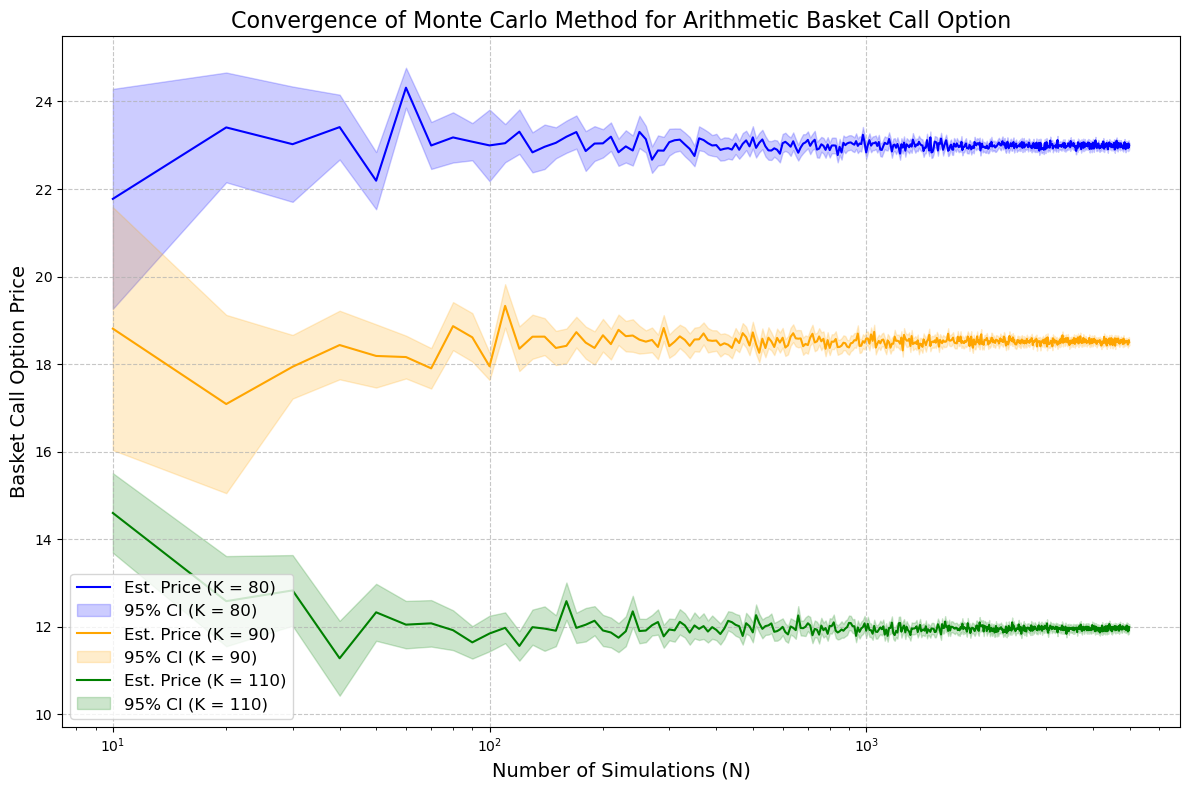

In [25]:
import numpy as np
import matplotlib.pyplot as plt
N_values = [10 * i for i in range(1, 500)]  # Different numbers of Monte Carlo simulations, adjusted to start from 10

# Create plots for convergence and variance
plt.figure(figsize=(12, 8))  # Make the figure slightly larger
colors = ['b', 'orange', 'g']  # Custom colors for each strike price
for idx, K_i in enumerate(K):
    prices = []
    std_devs = []

    for N_i in N_values:
        P_ab, P_std = price_arithmetic_basket(sigma, R, r, S_0, c, T, K_i, N_i)
        prices.append(P_ab)
        std_devs.append(P_std)

    # Plot convergence of price
    plt.plot(N_values, prices, color=colors[idx], linestyle='-', linewidth=1.5, label=f'Est. Price (K = {K_i})')
    # Adding shaded area for confidence interval
    lower_bound = [p - 1.96 * s for p, s in zip(prices, std_devs)]
    upper_bound = [p + 1.96 * s for p, s in zip(prices, std_devs)]
    plt.fill_between(N_values, lower_bound, upper_bound, color=colors[idx], alpha=0.2, label=f'95% CI (K = {K_i})')

# Customize plot appearance
plt.xscale('log')
plt.xlabel('Number of Simulations (N)', fontsize=14)
plt.ylabel('Basket Call Option Price', fontsize=14)
plt.title('Convergence of Monte Carlo Method for Arithmetic Basket Call Option', fontsize=16)
plt.legend(fontsize=12, loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('convergence_plot.png', format='png', dpi=300)
plt.show()


## B.4

In [27]:
# Load data from the given .mat file
mat = scipy.io.loadmat('HA24_data.mat')

# Extract data from the loaded .mat file
# S_0: Initial asset prices (nx1 array, representing different initial prices for each asset)
# S_1: Asset prices at a later time (nx1 array, used in ELN calculation)
# c: Weight of each asset in the basket (nx1 array)
# R: Correlation matrix of the assets (nxn matrix)
# sigma: Volatility of each asset (nx1 array)
S_0 = mat['S0'].T  # Transpose to ensure nx1 shape
S_1 = mat['S1'].T  # Transpose to ensure nx1 shape
c = mat['c']       # Weight of each asset in the basket (nx1 array)
R = mat['rho']     # Correlation matrix for the assets (nxn matrix)
sigma = mat['sigma'].T  # Transpose to ensure nx1 shape

# Set other parameters
r = -0.001         # Risk-free interest rate (can be negative)
K = 1              # Strike price of the option
T = 4              # Time to maturity (in years)
N = 1000000        # Number of Monte Carlo simulations

# Calculate and print the price for an arithmetic basket call option using Monte Carlo simulation
P_ab, std = price_arithmetic_basket(sigma, R, r, S_0, c, T, K, N, normalize=S_0)
print(f"Price of a {K} strike call arithmetic basket option with {N} "
      f"simulations is {P_ab:.6f} with a standard deviation of {std:.6f}")

# Calculate and print the participation ratio for the equity-linked note
pr = (1.2 - np.exp(-r * T)) / P_ab
print(f"Participation Ratio: {pr:.6f}")

# Calculate the Equity-Linked Note (ELN) price
T = 3             # Time to maturity for the ELN (in years)
NA = 100          # Notional amount for the ELN

# Calculate the arithmetic basket price for S_1 with adjusted maturity
P_ab, _ = price_arithmetic_basket(sigma, R, r, S_1, c, T, K, N, normalize=S_0)
eln_price = NA * (np.exp(-r * T) + pr * P_ab)

# Print the ELN price
print(f"Equity-Linked Note Price: {eln_price:.6f}")

Price of a 1 strike call arithmetic basket option with 1000000 simulations is 0.118424 with a standard deviation of 0.000097
Participation Ratio: 1.655005
Equity-Linked Note Price: 118.920485
